# British Airways Virtual Experience Task 1 - Ayaan Danish

## Dataset Preparation w/ Web Scraping

### Importing Libraries

In [117]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

### Scraping the reviews using Beautiful Soup

In [118]:
baseUrl = 'https://www.airlinequality.com/airline-reviews/british-airways'
pagesToScrape = 36
reviewList = []
recommendedList = []

#For all pages
for pageNum in range(1, pagesToScrape+1):
    reviewCount = 0
    page = requests.get(f'{baseUrl}/page/{pageNum}/?sortby=post_date%3ADesc&pagesize=100')
    doc = BeautifulSoup(page.text, 'html.parser')

    #Find all reviews in the current page
    reviewTags = doc.find_all(['div'], class_='text_content')

    #Find whether each review is recommended
    recommendedTags = doc.find_all(['td'], class_='review-rating-header recommended')

    for recommendation in recommendedTags:
      recommendedList.append(recommendation.next_sibling.get_text())

    #For all reviews in the page
    for review in reviewTags:
       reviewList.append(review.get_text())
       reviewCount += 1
    
    print(f'Gathered {reviewCount} reviews from page {pageNum} -- {len(reviewList)} Total' )

Gathered 100 reviews from page 1 -- 100 Total
Gathered 100 reviews from page 2 -- 200 Total
Gathered 100 reviews from page 3 -- 300 Total
Gathered 100 reviews from page 4 -- 400 Total
Gathered 100 reviews from page 5 -- 500 Total
Gathered 100 reviews from page 6 -- 600 Total
Gathered 100 reviews from page 7 -- 700 Total
Gathered 100 reviews from page 8 -- 800 Total
Gathered 100 reviews from page 9 -- 900 Total
Gathered 100 reviews from page 10 -- 1000 Total
Gathered 100 reviews from page 11 -- 1100 Total
Gathered 100 reviews from page 12 -- 1200 Total
Gathered 100 reviews from page 13 -- 1300 Total
Gathered 100 reviews from page 14 -- 1400 Total
Gathered 100 reviews from page 15 -- 1500 Total
Gathered 100 reviews from page 16 -- 1600 Total
Gathered 100 reviews from page 17 -- 1700 Total
Gathered 100 reviews from page 18 -- 1800 Total
Gathered 100 reviews from page 19 -- 1900 Total
Gathered 100 reviews from page 20 -- 2000 Total
Gathered 100 reviews from page 21 -- 2100 Total
Gathered 1

### Cleaning the data

In [119]:
for i, review in enumerate(reviewList):
    if '|' in review:
        reviewList[i] = review.split('|')[1]

for i, recommendation in enumerate(recommendedList):
    if recommendation == 'yes':
        recommendedList[i] = True
    else:
        recommendedList[i] = False

### Creating a Dataframe using Pandas

In [120]:
df = pd.DataFrame()
df['reviews'] = reviewList
df['recommended'] = recommendedList
df.head(10)

,reviews,recommended
0,We were traveling as a family (5 people). Be...,False
1,Flight at 8.40am from DUB to LCY cancelled 11...,False
2,Terrible. I have traveled twice with them th...,False
3,The customer service is ugly. Tried calling ...,False
4,Most uncomfortable flight I have ever experi...,False
5,I booked our first out of country trip to ta...,False
6,My husband and I booked seats within our prem...,False
7,"May 3, flew from Seattle to Heathrow then to...",False
8,I went through three flights to reach my dest...,False
9,An excellent flight in Club World on British ...,True


### Exporting dataset to CSV file

In [121]:
df.to_csv('reviewDataset.csv', index=False)

## Performing Sentiment Analysis using VADER Model

### Importing libraries

In [171]:
import nltk
from tqdm.notebook import tqdm
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sia = SentimentIntensityAnalyzer()

### Reading dataset

In [197]:
df = pd.read_csv('reviewDataset.csv')
df.head(10)

,reviews,recommended
0,We were traveling as a family (5 people). Be...,False
1,Flight at 8.40am from DUB to LCY cancelled 11...,False
2,Terrible. I have traveled twice with them th...,False
3,The customer service is ugly. Tried calling ...,False
4,Most uncomfortable flight I have ever experi...,False
5,I booked our first out of country trip to ta...,False
6,My husband and I booked seats within our prem...,False
7,"May 3, flew from Seattle to Heathrow then to...",False
8,I went through three flights to reach my dest...,False
9,An excellent flight in Club World on British ...,True


### Getting the Sentiment Score for each review


In [198]:
sentimentScores = []

for i, rev in enumerate(df['reviews']):
    sentimentScores.append({
        'negative':sia.polarity_scores(rev)['neg'],
        'positive':sia.polarity_scores(rev)['pos'],
        'compound':sia.polarity_scores(rev)['compound'],
    })

In [199]:
scores = pd.DataFrame(sentimentScores)
scores.head()

,negative,positive,compound
0,0.082,0.086,0.1189
1,0.161,0.112,-0.9617
2,0.292,0.036,-0.9493
3,0.125,0.000,-0.6908
4,0.101,0.067,-0.3230


In [200]:
df = pd.concat([df, scores], axis = 1, join='inner')
df.head()

,reviews,recommended,negative,positive,compound
0,We were traveling as a family (5 people). Be...,False,0.082,0.086,0.1189
1,Flight at 8.40am from DUB to LCY cancelled 11...,False,0.161,0.112,-0.9617
2,Terrible. I have traveled twice with them th...,False,0.292,0.036,-0.9493
3,The customer service is ugly. Tried calling ...,False,0.125,0.000,-0.6908
4,Most uncomfortable flight I have ever experi...,False,0.101,0.067,-0.3230


### Plotting the results

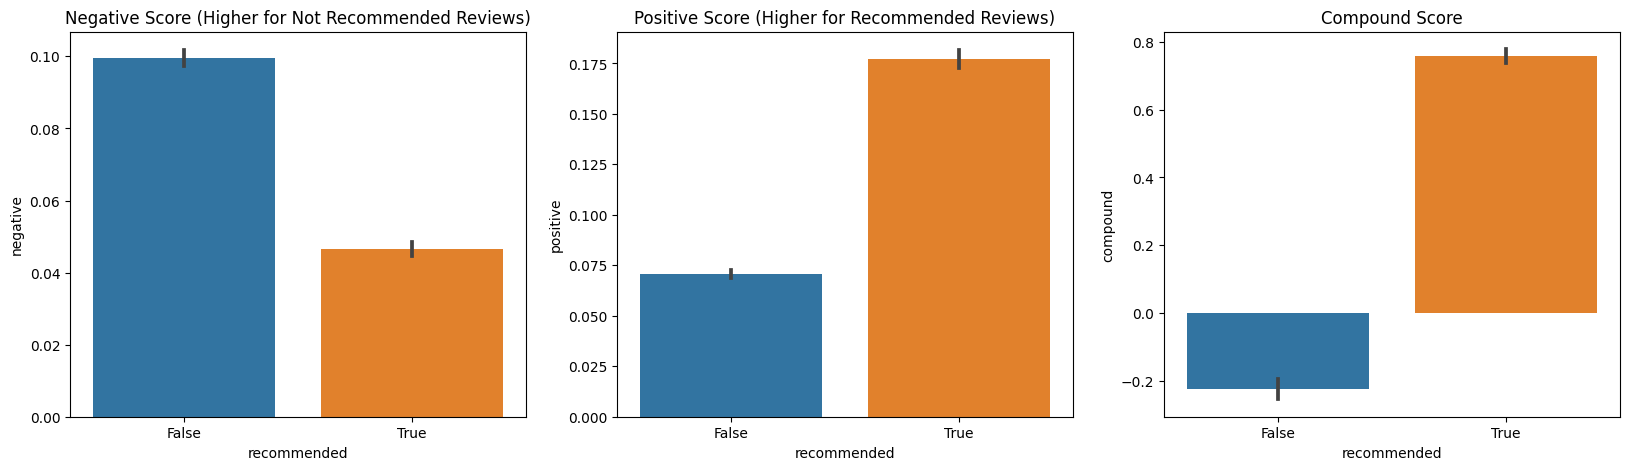

In [233]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
sns.barplot(data=df, x='recommended', y='negative', ax=axs[0])
sns.barplot(data=df, x='recommended', y='positive', ax=axs[1])
sns.barplot(data=df, x='recommended', y='compound', ax=axs[2])

axs[0].set_title('Negative Score (Higher for Not Recommended Reviews)')
axs[1].set_title('Positive Score (Higher for Recommended Reviews)')
axs[2].set_title('Compound Score')

plt.show()

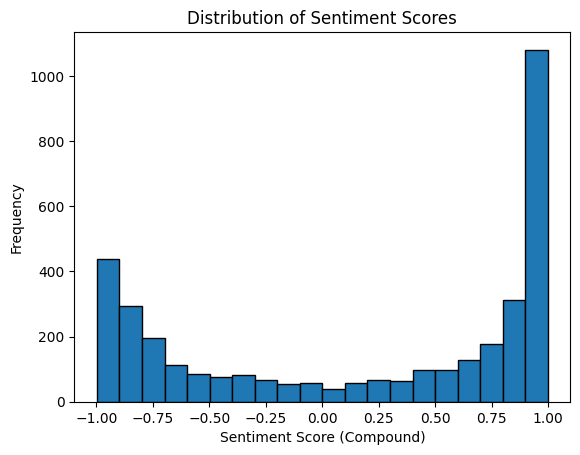

In [227]:
# Create the histogram
plt.hist(df['compound'], bins=20, edgecolor='black')

# Set plot labels and title
plt.xlabel('Sentiment Score (Compound)')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Scores')

# Show the plot
plt.show()

## Generating a Word Cloud

### Importing libraries

In [237]:
from wordcloud import WordCloud, STOPWORDS

### Reading the dataset

In [234]:
df = pd.read_csv('reviewDataset.csv')
df.head()

,reviews,recommended
0,We were traveling as a family (5 people). Be...,False
1,Flight at 8.40am from DUB to LCY cancelled 11...,False
2,Terrible. I have traveled twice with them th...,False
3,The customer service is ugly. Tried calling ...,False
4,Most uncomfortable flight I have ever experi...,False


### Creating the list of words

In [278]:
text = " ".join(review for review in df.reviews)
print('Total number of words in all reviews are', len(text))

Total number of words in all reviews are 3161217


### Generating and plotting the Word Cloud

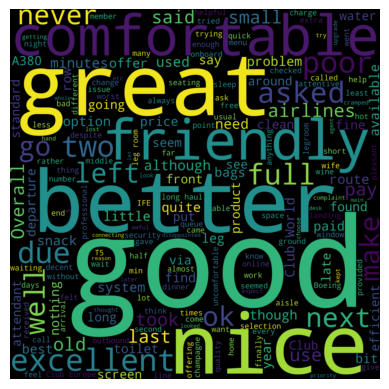

In [275]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["airport", "passport", "pass", "bus", "flight", "ticket", "fly", "flown", "crew", 
                  "travel", "hotel", "transit", "seat", "BA", "food", "British Airway", "London", 'staff', 
                  "service", 'british', 'airways', 'airline', 'flight', 'flights', 'experience', 'experiences',
                  'journey', 'travel', 'travelling', 'trip', 'passenger', 'passengers', 'customer',
                  'customers', 'service', 'services', 'crew', 'boarding', 'delay', 'delays', 'cancelled',
                  'cancellation', 'delayed', 'cancelled', 'baggage', 'luggage', 'check', 'check-in', 'airport',
                  'seat', 'seats', 'pilot', 'pilots', 'steward', 'stewards', 'food', 'meals', 'entertainment',
                  'entertainments', 'booking', 'book', 'ticket', 'tickets', 'refund', 'money', 'aircraft',
                  'business', 'class', 'economy', 'premium', 'cabin', 'gate', 'gate', 'terminal', 'passports',
                  'inflight', 'in-flight', 'wifi', 'time', 'Heathrow', 'one', 'hour', 'first', 'lounge', 'bag', 
                  'will', 'LHR', 'plane', 'drink', 'back', 'hours', 'bag', 'told', 'return', 'new', 'now', 'even',
                  'meal', 'day', 'u', 'flew', 'us', 'choice', 'way', 'offered', 'really', 'flying', 'served',
                  'drinks', 'board', 'Gatwick', 'got', 'given', 'take', 'still', 'breakfast', 'another', 'much',
                  'arrived', 'booked', 'minute', 'made', 'people', 'breakfast'])

# Generate a word cloud image
wordcloud = WordCloud(width=3000, height=3000, stopwords=stopwords, background_color="black").generate(text)


plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()